# 主成分分析(Principal Component Analysis)

- 非监督学习的机器学习算法
- 主要用于数据的降维
- 通过降维，可以发现更便于人类理解的特征

PCA(principal Component Analysis)，即主成分分析方法，是一种使用最广泛的数据压缩算法。在PCA中，数据从原来的坐标系转换到新的坐标系，由数据本身决定。转换坐标系时，以方差最大的方向作为坐标轴方向，因为数据的最大方差给出了数据的最重要的信息。第一个新坐标轴选择的是原始数据中方差最大的方法，第二个新坐标轴选择的是与第一个新坐标轴正交且方差次大的方向。重复该过程，重复次数为原始数据的特征维数。

假设我们要将特征从  n  维度降到  k  维：PCA 首先找寻  k  个  n  维向量，然后将特征投影到这些向量构成的  k 维空间，并保证投影误差足够小。 如为了将特征维度从三维降低到二位，PCA 就会先找寻两个三维向量  u(1),u(2) ，二者构成了一个二维平面，然后将原来的三维特征投影到该二维平面上。


>为什么用方差: 方差描述随机变量对于数学期望(均值)的偏离程度，因此方差（variance)是用来衡量随机变量或一组数据时离散程度的度量。每个样本值与全体样本值的平均数之差的平方值的平均数。公式为

>$$
Var(x) = \frac {1}{m} \sum _{i=1}^m(x_i - \overline x)^2
$$

>标准差为方差开根号。

算法流程：

# 均值归零

In [1]:
# 生成模拟数据
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

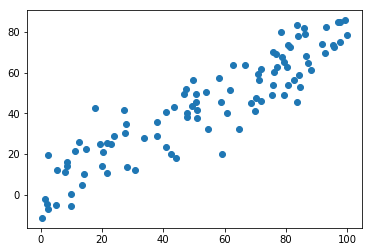

In [3]:
plt.scatter(X[:,0], X[:, 1])
plt.show()

In [4]:
# 归零函数
# np.mean。axis指明了矩阵的均值策略。对于m * n的矩阵
# 默认对所有值求均值，返回一个实数；
# 为0时，对各列求均值, 返回1 * n 矩阵 
# 为1时，对各行求均值, 返回m * 1 矩阵
def demean(X):
    return X - np.mean(X, axis=0)

In [5]:
X_demean = demean(X)

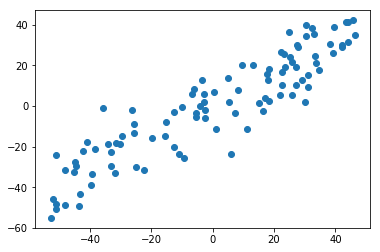

In [6]:
plt.scatter(X_demean[:,0], X_demean[:, 1])
plt.show()

In [7]:
np.mean(X_demean[:,0])

-3.9150904740381519e-14

In [8]:
np.mean(X_demean[:,1])

-9.2370555648813027e-16

# 梯度上升法计算主成分

经过均值归零化处理之后，样本的所有特性均值为0。带入方差公式，得到

$
Var(x) = \frac {1}{m} \sum _{i=1}^mx_i^2
$

假设现在有这样一个轴的方向向量为$w =(w_1, w_2)$(暂时只考虑二个特征值的情况)，则样本映射到$w$后，方差为

$
Var(X_{project}) = \frac {1}{m} \sum _{i=1}^m(X_{project}^{(i)} - \overline X_{project})^2 = \frac {1}{m} \sum _{i=1}^m||X_{project}^{(i)}||^2
$

要求出方差最大，则需要求出$X_{project}$，即映射到$w$方向的坐标向量

假设点原来的坐标为$X^{(i)} = (X_1^{(i)}, X_2^{(i)})$, 映射到$w$后的坐标为$(X_{pr1}^{(i)}, X_{pr2}^{(i)})$,则

$$
X^{(i)}\cdot w = ||X^{(i)}||\cdot || w || \cdot \cos \theta (向量点乘)\\
X^{(i)}\cdot w = ||X^{(i)}|| \cdot \cos \theta (假设w为单位向量，余弦定理) \\ 
X^{(i)}\cdot w = ||X_{project}^{(i)} || (三角函数运算结果)
$$

此时方差就可以写为

$
Var(X_{project}) = \frac {1}{m} \sum _{i=1}^m||X^{(i)}\cdot w||^2 \\
Var(X_{project}) = \frac {1}{m} \sum _{i=1}^m(X_1^{(i)}w_1 + X_2^{(i)}w_2 + ... + X_n^{(i)}w_n)^2 = f(X) \\
$

对未知量求导

$
\nabla f = 
\begin{pmatrix}
\frac {\partial f}{\partial w_1} \\
\frac {\partial f}{\partial w_2} \\
\vdots \\
\frac {\partial f}{\partial w_n}
\end{pmatrix}
=\frac {2}{m}
\begin{pmatrix}
\sum _{i=1}^m(X_1^{(i)}w_1 + X_2^{(i)}w_2 + ... + X_n^{(i)}w_n)X_1^{(i)} \\
\sum _{i=1}^m(X_1^{(i)}w_1 + X_2^{(i)}w_2 + ... + X_n^{(i)}w_n)X_2^{(i)} \\
\vdots \\
\sum _{i=1}^m(X_1^{(i)}w_1 + X_2^{(i)}w_2 + ... + X_n^{(i)}w_n)X_n^{(i)} \\
\end{pmatrix}
=\frac {2}{m}
\begin{pmatrix}
\sum _{i=1}^m(X^{(i)}w)X_1^{(i)} \\
\sum _{i=1}^m(X^{(i)}w)X_2^{(i)} \\
\vdots \\
\sum _{i=1}^m(X^{(i)}w)X_n^{(i)} \\
\end{pmatrix} \\
=\frac {2}{m} \cdot
\begin{pmatrix}
X^{(1)}w & X^{(2)}w & \cdots & X^{(m)}w
\end{pmatrix}
\cdot
\begin{pmatrix}
X_1^{(1)} & X_2^{(1)} & \cdots & X_n^{(1)} \\
X_1^{(2)} & X_2^{(2)} & \cdots & X_n^{(2)} \\
\vdots \\
X_1^{(m)} & X_2^{(m)} & \cdots & X_n^{(m)} \\
\end{pmatrix} \\
=\frac {2}{m} \cdot (Xw)^T \cdot X \\
=\frac {2}{m} \cdot X^T \cdot (Xw)
$

In [9]:
# 根据参数求目标函数(方差)值
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

In [10]:
# 对目标函数求导
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [11]:
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [12]:
# w转换为单位向量
def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(initial_w)
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break

        cur_iter += 1
        
    return w

In [13]:
initial_w = np.random.random(X.shape[1])
initial_w

array([ 0.49202715,  0.56595892])

In [14]:
eta = 0.001

In [15]:
# 不能使用StandarScaler标准化数据

In [16]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([ 0.6560944 ,  0.75467883])

In [17]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

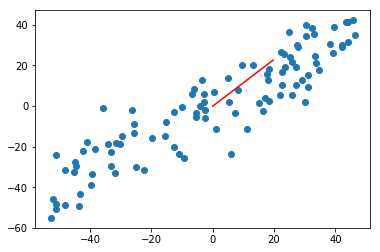

In [18]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0] * 30], [0, w[1] * 30], color='r')
plt.show()